<a href="https://colab.research.google.com/github/surabhipandey18/Animals-Classification/blob/main/Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
tf.random.set_seed(42)

In [5]:
#get filepath for data
file_path = '/content/drive/MyDrive/DL study/archive (8)/raw-img'

In [6]:
#image setting
img_size = (128, 128)
batch_size = 32

In [8]:
#CNN- Load and process data
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    file_path, target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    file_path, target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 21017 images belonging to 10 classes.
Found 5249 images belonging to 10 classes.


<Figure size 1000x1000 with 0 Axes>

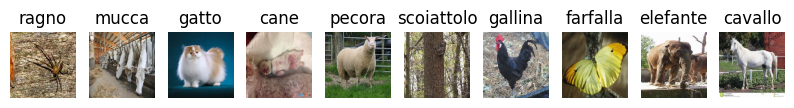

In [9]:
images, labels = next(train_generator)

class_names = list(train_generator.class_indices.keys())

images_per_class= {}
plt.figure(figsize=(10, 10))
for i in range(images.shape[0]):
    predicted_class_index = np.argmax(labels[i])
    predicted_class = class_names[predicted_class_index]
    if predicted_class not in images_per_class:
        images_per_class[predicted_class] = images[i]
    if len(images_per_class) == len(class_names):
      break

plt.figure(figsize = (10,10))
i = 1
for class_name, image in images_per_class.items():
    plt.subplot(1, len(images_per_class), i)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
#CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [ ]:
#train CNN
with tf.device('/device:GPU:0'):
  history = model.fit(
  train_generator, epochs = 30,
  validation_data = validation_generator)

Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 9823s 15s/step - accuracy: 0.2872 - loss: 2.0362 - val_accuracy: 0.4690 - val_loss: 1.4975
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 93s 142ms/step - accuracy: 0.4523 - loss: 1.5657 - val_accuracy: 0.5814 - val_loss: 1.2138
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 95s 144ms/step - accuracy: 0.5562 - loss: 1.3033 - val_accuracy: 0.5856 - val_loss: 1.1871
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 96s 146ms/step - accuracy: 0.5992 - loss: 1.1665 - val_accuracy: 0.6428 - val_loss: 1.0422
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 97s 147ms/step - accuracy: 0.6466 - loss: 1.0190 - val_accuracy: 0.6737 - val_loss: 0.9630
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 99s 150ms/step - accuracy: 0.6901 - loss: 0.8975 - val_accuracy: 0.6504 - val_loss: 1.0528
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 98s 149ms/step - accuracy: 0.7286 - loss: 0.7777 - val_accuracy: 0.6778 - val_loss: 0.9715
Epoch 8/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 95s 145ms/step - accuracy: 0.7582 - loss: 0

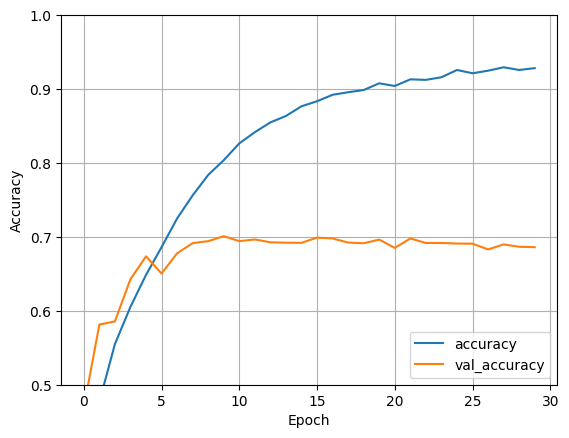

In [ ]:
#plot cnn accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#transfer learning model- preprocessing
tl_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

In [ ]:
tl_traingen = tl_datagen.flow_from_directory(
    file_path, target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

tl_valgen = tl_datagen.flow_from_directory(
    file_path, target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 21017 images belonging to 10 classes.
Found 5249 images belonging to 10 classes.


In [ ]:
#Transfer Learning model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

tl_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(tl_traingen.num_classes, activation='softmax')
])

tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#train tl model
with tf.device('/device:GPU:0'):
  tl_history = tl_model.fit(
    tl_traingen, epochs = 30,
    validation_data = tl_valgen)

Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 121s 171ms/step - accuracy: 0.8234 - loss: 0.5848 - val_accuracy: 0.9362 - val_loss: 0.1976
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 99s 151ms/step - accuracy: 0.9305 - loss: 0.2250 - val_accuracy: 0.9446 - val_loss: 0.1819
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 101s 153ms/step - accuracy: 0.9404 - loss: 0.1841 - val_accuracy: 0.9432 - val_loss: 0.1739
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 136s 144ms/step - accuracy: 0.9524 - loss: 0.1423 - val_accuracy: 0.9444 - val_loss: 0.1879
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 99s 151ms/step - accuracy: 0.9579 - loss: 0.1263 - val_accuracy: 0.9459 - val_loss: 0.1818
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 97s 147ms/step - accuracy: 0.9597 - loss: 0.1204 - val_accuracy: 0.9465 - val_loss: 0.1929
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 99s 151ms/step - accuracy: 0.9622 - loss: 0.1064 - val_accuracy: 0.9440 - val_loss: 0.1849
Epoch 8/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 96s 146ms/step - accuracy: 0.9679 - loss

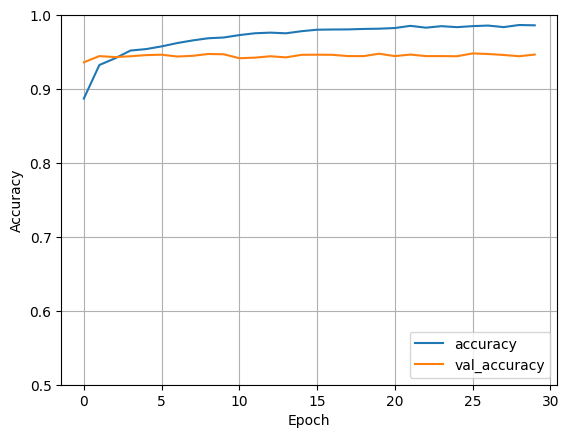

In [ ]:
#plot transfer learning graph
plt.plot(tl_history.history['accuracy'], label='accuracy')
plt.plot(tl_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()